In [1]:
# 책에서처럼 일단 공동 import를 하자
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 불필요한 warning이 나오지 않도록 하는 곳
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# RandomForest를 사용
from sklearn.ensemble import RandomForestClassifier

In [3]:
# mnist 데이터셋을 불러오자
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [4]:
# train set과 test set을 분리해야 한다.
# train과 test set을 그냥 numpy형태로 다 바꿔서 귀찮게 하지 말자.
from sklearn.model_selection import train_test_split
mnist_data = mnist.data.to_numpy()
mnist_target = mnist.target.to_numpy()
# Random Forest는 과적합이 된거 같고 training 시간도 짧으니 default setting으로 해보자
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, random_state=0)
# 잘 나뉘었는가 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52500, 784)
(17500, 784)
(52500,)
(17500,)


In [18]:
# random forest 모델을 training data를 이용해 학습하자
# 주요한 parameter : n_estimators(default 100), max_depth(default None(끝까지 간다)), max_feature(일반적으로 default값을 쓰는 것이 결과가 좋다고 함.scikit learn에서)
# max_depth는 5부터 50까지로 테스트해보고, n_estimators는 50부터 500까지 테스트해보자

randforest_models = []
train_score = []
test_score = []
max_depth_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_estimator_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for n in n_estimator_list:
    print("calculating n_estimator={}".format(n))
    temp_models = []
    temp_train_score = []
    temp_test_score = []
    for m_d in max_depth_list:
        randforest = RandomForestClassifier(n_estimators=n, max_depth=m_d).fit(X_train, y_train)
        temp_train_score.append(randforest.score(X_train, y_train))
        temp_test_score.append(randforest.score(X_test, y_test))
        temp_models.append(randforest)
        print("calculated accuracy n_estimator={} max_depth={}".format(n, m_d))
    randforest_models.append(temp_models)
    train_score.append(temp_train_score)
    test_score.append(temp_test_score)



calculating n_estimator=50
calculated accuracy n_estimator=50 max_depth=5
calculated accuracy n_estimator=50 max_depth=10
calculated accuracy n_estimator=50 max_depth=15
calculated accuracy n_estimator=50 max_depth=20
calculated accuracy n_estimator=50 max_depth=25
calculated accuracy n_estimator=50 max_depth=30
calculated accuracy n_estimator=50 max_depth=35
calculated accuracy n_estimator=50 max_depth=40
calculated accuracy n_estimator=50 max_depth=45
calculated accuracy n_estimator=50 max_depth=50
calculating n_estimator=100
calculated accuracy n_estimator=100 max_depth=5
calculated accuracy n_estimator=100 max_depth=10
calculated accuracy n_estimator=100 max_depth=15
calculated accuracy n_estimator=100 max_depth=20
calculated accuracy n_estimator=100 max_depth=25
calculated accuracy n_estimator=100 max_depth=30
calculated accuracy n_estimator=100 max_depth=35
calculated accuracy n_estimator=100 max_depth=40
calculated accuracy n_estimator=100 max_depth=45
calculated accuracy n_esti

In [21]:
# n_estimator에 대해 더 추가해서 테스트해보자
n_estimator_list_add = [550,600,650]
max_depth_list_add = [30, 35, 40, 45, 50]
for n in n_estimator_list_add:
    print("calculating n_estimator={}".format(n))
    temp_models = []
    temp_train_score = []
    temp_test_score = []
    for m_d in max_depth_list_add:
        randforest = RandomForestClassifier(n_estimators=n, max_depth=m_d).fit(X_train, y_train)
        temp_train_score.append(randforest.score(X_train, y_train))
        temp_test_score.append(randforest.score(X_test, y_test))
        temp_models.append(randforest)
        print("calculated accuracy n_estimator={} max_depth={}".format(n, m_d))
    randforest_models.append(temp_models)
    train_score.append(temp_train_score)
    test_score.append(temp_test_score)

calculating n_estimator=550
calculated accuracy n_estimator=550 max_depth=30
calculated accuracy n_estimator=550 max_depth=35
calculated accuracy n_estimator=550 max_depth=40
calculated accuracy n_estimator=550 max_depth=45
calculated accuracy n_estimator=550 max_depth=50
calculating n_estimator=600
calculated accuracy n_estimator=600 max_depth=30
calculated accuracy n_estimator=600 max_depth=35
calculated accuracy n_estimator=600 max_depth=40
calculated accuracy n_estimator=600 max_depth=45
calculated accuracy n_estimator=600 max_depth=50
calculating n_estimator=650
calculated accuracy n_estimator=650 max_depth=30
calculated accuracy n_estimator=650 max_depth=35
calculated accuracy n_estimator=650 max_depth=40
calculated accuracy n_estimator=650 max_depth=45
calculated accuracy n_estimator=650 max_depth=50


In [23]:
# 예측을 잘 하는가?
for i,n in enumerate(n_estimator_list):
    print("\n")
    for j,m_d in enumerate(max_depth_list):
        print("n_estimator={} max_depth={} / train accuracy : {} / test accuracy : {}".format(n, m_d, train_score[i][j], test_score[i][j]))
for i,n in enumerate(n_estimator_list_add):
    print("\n")
    for j,m_d in enumerate(max_depth_list_add):
        print("n_estimator={} max_depth={} / train accuracy : {} / test accuracy : {}".format(n, m_d, train_score[len(n_estimator_list)+i][j], test_score[len(n_estimator_list)+i][j]))



n_estimator=50 max_depth=5 / train accuracy : 0.8561904761904762 / test accuracy : 0.8468571428571429
n_estimator=50 max_depth=10 / train accuracy : 0.9657142857142857 / test accuracy : 0.9408
n_estimator=50 max_depth=15 / train accuracy : 0.9974666666666666 / test accuracy : 0.9609142857142857
n_estimator=50 max_depth=20 / train accuracy : 0.999352380952381 / test accuracy : 0.9629142857142857
n_estimator=50 max_depth=25 / train accuracy : 0.9998476190476191 / test accuracy : 0.9648571428571429
n_estimator=50 max_depth=30 / train accuracy : 0.9999619047619047 / test accuracy : 0.9651428571428572
n_estimator=50 max_depth=35 / train accuracy : 1.0 / test accuracy : 0.9649714285714286
n_estimator=50 max_depth=40 / train accuracy : 1.0 / test accuracy : 0.9637714285714286
n_estimator=50 max_depth=45 / train accuracy : 1.0 / test accuracy : 0.9640571428571428
n_estimator=50 max_depth=50 / train accuracy : 0.9999809523809524 / test accuracy : 0.9636


n_estimator=100 max_depth=5 / train a

- 모든 상황에서는 과적합이 나올 수 밖에 없다. 왜냐하면 과적합을 피하려고 n_estimator를 내리면 test accuracy도 너무 내려간다.
- 결론적으로 과적합을 그냥 놔두고 test accuracy를 높이는 방향으로 잡았을 때 n_estimator=600 max_depth=45가 test accuracy 0.970으로 가장 높았다. train accuracy는 1이다.

prediction 1 : 6
prediction 2 : 1
prediction 3 : 2
prediction 4 : 7
prediction 5 : 2
prediction 6 : 0
prediction 7 : 7
prediction 8 : 3
prediction 9 : 5
prediction 10 : 8


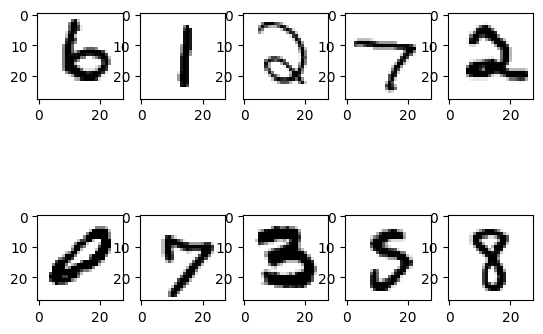

In [7]:
# test set에서 랜덤하게 10개를 뽑은 후 이를 출력해서 예측값과 실제 값이 맞는지 틀린지 확인해보자
rand_index = np.random.randint(low=0, high=len(X_test), size=10)
for randin, i in zip(rand_index, range(1,len(rand_index)+1)):
    predict = X_test[randin].reshape(1,-1)
    print("prediction {} : {}".format(i,randforest.predict(predict)[0]))
    plt.subplot(2,5,i)
    plt.imshow((X_test[randin].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')